In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')

## Resample and clean

In [8]:
tdata = pd.read_csv('../data/data.txt.gz', names=['date', 'time', 'epoch', 'moteid', 
                                                  'temperature', 'humidity', 'light', 'voltage'], sep=' ')
tdata['date-time'] = pd.to_datetime(tdata['date']+' '+tdata['time'])
tdata = tdata.set_index('date-time')
tdata.head()

,date,time,epoch,moteid,temperature,humidity,light,voltage
date-time,,,,,,,,
2004-03-31 03:38:15.757551,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
2004-02-28 00:59:16.027850,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2004-02-28 01:03:16.333930,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
2004-02-28 01:06:16.013453,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
2004-02-28 01:06:46.778088,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [13]:
tdata = tdata.loc['2004-02-28':'2004-03-01']
loc_df = pd.read_csv('http://db.csail.mit.edu/labdata/mote_locs.txt', sep=' ',names=[0,'X','Y']).set_index(0)

M = 22
cross_df = pd.crosstab(tdata.index, tdata.moteid, tdata.temperature, aggfunc=lambda x:list(x)[0])
cross_df = cross_df.resample(str(M)+'min').mean().dropna(how='any')
print(cross_df.shape, len(cross_df.dropna()), cross_df.cov().dropna().shape)

G_all = (((cross_df - cross_df.mean()).T).dot(cross_df - cross_df.mean())/len(cross_df)) # Estim. Cov. Mat.
G_all_npcov = cross_df.cov()
train_data = loc_df.loc[cross_df.columns][['X','Y']]
train_data['Temp'] = cross_df.mean()

(138, 53) 138 (53, 53)


## Checking stationarity

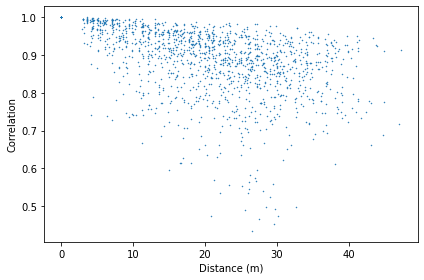

In [14]:
dis = []
cor = []
corr_mat = cross_df.corr()
for col in corr_mat.corr().columns:
    for col2 in corr_mat.corr().columns:
        dis.append(np.linalg.norm(loc_df.loc[col] - loc_df.loc[col2]))
        cor.append(corr_mat.loc[col, col2])
        
fig, ax = plt.subplots()
ax.scatter(dis, cor, s=0.1)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Correlation')
plt.tight_layout()
plt.show()